In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import pandas as pd
%matplotlib inline

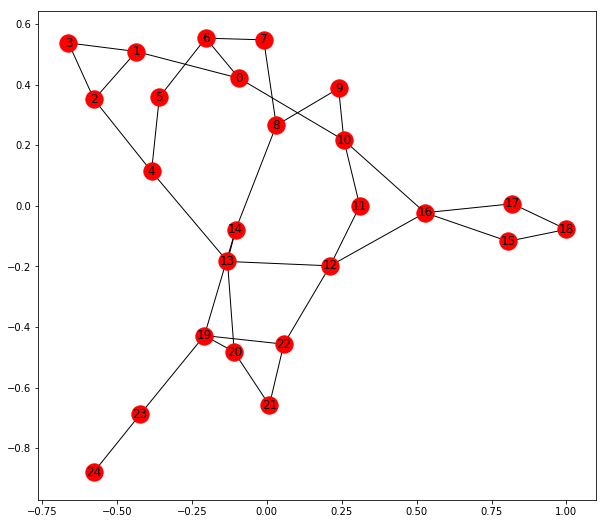

In [2]:
G = nx.Graph() 
nodes = list(range(25))
for i in nodes:
    G.add_node(i)

path = pd.read_excel('Path.xlsx')

for i in range(0, path.shape[0]):
    a = path.loc[i][0]
    b = path.loc[i][1]
    G.add_edge(a,b)
    G.add_edge(b,a)

plt.figure(figsize = (10,9))
nx.draw_networkx(G)

In [3]:
G.edges()

EdgeView([(0, 1), (0, 6), (0, 10), (1, 3), (1, 2), (2, 3), (2, 4), (4, 5), (4, 13), (5, 6), (6, 7), (7, 8), (8, 9), (8, 14), (9, 10), (10, 11), (10, 16), (11, 12), (12, 22), (12, 16), (12, 13), (13, 14), (13, 20), (14, 19), (15, 16), (15, 18), (16, 17), (17, 18), (19, 20), (19, 22), (19, 23), (20, 21), (21, 22), (23, 24)])

In [4]:
def create_tuples_from_basis(basis): 
    """
    Converts a list of nodes (that form a cycle basis) into a list of the edges between those nodes 
    """
    tuples = [] 
    for i in range(len(basis) - 1): 
        tuples.append((basis[i], basis[i + 1]))
    tuples.append((basis[len(basis) - 1], basis[0]))
    return tuples

In [5]:
def convert_cycle_basis_tuples(cb): 
    """
    Converts the entire cycle basis into an edge-list representation 
    """
    cb_tuples = []
    for basis in cb: 
        cb_tuples.append(create_tuples_from_basis(basis))
    return cb_tuples

In [6]:
def convert_basis_to_binary(basis): 
    """ 
    Converts an edge-list representation into a binary representation, where 0 = edge not in edge-list, 1 = edge in edge-list
    """
    length = len(G.edges())
    binary = np.zeros(length)
    for index, edge in enumerate(G.edges): 
        if (edge in basis) or ((edge[1], edge[0]) in basis):
            binary[index] = 1
    return binary

In [7]:
def convert_binary_to_basis(binary): 
    """
    Converts a binary representation of edges into an list of edge-tuples
    """
    edges = []
    edge_set = list(G.edges())
    index = 0 
    for b, e in zip(binary, edge_set): 
        if b == 1: 
            edges.append(edge_set[index])
        index += 1
    return edges

In [8]:
def exclusive_or(binary1, binary2):
    """ 
    Performs the exclusive or function on a binary representation of an edge-list 
    Works on a list of ints (i.e., either 0 or 1)
    Would be more efficient if it worked on a single integer, but whatever 
    """
    xor = [] 
    for b1, b2 in zip(binary1, binary2): 
        xor.append(int(b1) ^ int(b2))
    return xor

In [9]:
def convert_cycle_basis_to_binary(cb):
    """ 
    Converts an edge list representation of a cycle basis to a binary representation of a cycle basis
    """
    cb_binary = [] 
    for basis in cb: 
        cb_binary.append(convert_basis_to_binary(basis))
    return cb_binary        

In [10]:
def get_all_cycles_home(cycle_basis):
    """ 
    Finds all simple cycles that involve the home node
    """
    cb_tuples = convert_cycle_basis_tuples(cycle_basis) 
    cb_binary = convert_cycle_basis_to_binary(cb_tuples)
    all_paths_binary = [] 
    all_paths_edges = [] 
    for i in range(len(cb_binary) - 1):
        for j in range(i + 1, len(cb_binary)):
            all_paths_binary.append(exclusive_or(cb_binary[i], cb_binary[j]))
    
    home_paths = [x for x in all_paths_binary if x[0] == 1 or x[1] == 1 or x[2] == 1]
    
    for path in home_paths:
        all_paths_edges.append(convert_binary_to_basis(path))
    return all_paths_edges

In [11]:
# Variables we need
nodes = list(G.nodes())
edges = list(G.edges())
cycle_basis = nx.cycle_basis(G)

In [12]:
all_cycles = get_all_cycles_home(cycle_basis)

In [13]:
def correct_path_ordering(path): 
    correct_path = []
    correct_path.append(path[0])
    visited = [] 
    visited.append(path[0])
    current_edge = path[0]
    next_node = current_edge[1]
    
    for i in range(len(path) - 1): # This isn't perfectly efficient, but whatever 
        for j in range(len(path)):
            if next_node in path[j] and path[j] not in visited:
                next_edge = path[j]
        if next_edge[0] == next_node:
            correct_path.append(next_edge)
            current_edge = next_edge
            next_node = next_edge[1]
            visited.append(next_edge)
        else:
            correct_path.append((next_edge[1], next_edge[0]))
            current_edge = next_edge
            next_node = next_edge[0]
            visited.append(next_edge)
    return correct_path

In [14]:
all_cycles

[[(0, 6),
  (0, 10),
  (6, 7),
  (7, 8),
  (8, 14),
  (10, 16),
  (12, 16),
  (12, 13),
  (13, 14),
  (15, 16),
  (15, 18),
  (16, 17),
  (17, 18)],
 [(0, 6),
  (0, 10),
  (4, 5),
  (4, 13),
  (5, 6),
  (10, 16),
  (12, 16),
  (12, 13),
  (15, 16),
  (15, 18),
  (16, 17),
  (17, 18)],
 [(0, 1),
  (0, 10),
  (1, 2),
  (2, 4),
  (4, 13),
  (10, 16),
  (12, 16),
  (12, 13),
  (15, 16),
  (15, 18),
  (16, 17),
  (17, 18)],
 [(0, 6),
  (0, 10),
  (6, 7),
  (7, 8),
  (8, 14),
  (10, 11),
  (11, 12),
  (12, 13),
  (13, 14)],
 [(0, 6), (0, 10), (4, 5), (4, 13), (5, 6), (10, 11), (11, 12), (12, 13)],
 [(0, 1), (0, 10), (1, 2), (2, 4), (4, 13), (10, 11), (11, 12), (12, 13)],
 [(0, 6),
  (0, 10),
  (6, 7),
  (7, 8),
  (8, 14),
  (10, 16),
  (12, 22),
  (12, 16),
  (13, 14),
  (13, 20),
  (20, 21),
  (21, 22)],
 [(0, 6),
  (0, 10),
  (4, 5),
  (4, 13),
  (5, 6),
  (10, 16),
  (12, 22),
  (12, 16),
  (13, 20),
  (20, 21),
  (21, 22)],
 [(0, 1),
  (0, 10),
  (1, 2),
  (2, 4),
  (4, 13),
  (10, 16),


In [15]:
path = correct_path_ordering(all_cycles[0])

In [16]:
def convert_edges_to_node_strings(path): 
    cycle = []
    for edge in path: 
        cycle.append("Node_" + str(edge[1]))
    return cycle

In [17]:
convert_edges_to_node_strings(path)

['Node_6',
 'Node_7',
 'Node_8',
 'Node_14',
 'Node_13',
 'Node_12',
 'Node_16',
 'Node_17',
 'Node_18',
 'Node_15',
 'Node_16',
 'Node_10',
 'Node_0']

In [18]:
def convert_all_cycles_to_node_strings(cycles):
    ns_cycles = []
    for cycle in cycles: 
        cpo = correct_path_ordering(cycle)
        ns = convert_edges_to_node_strings(cpo)
        ns_cycles.append(ns)
    return ns_cycles

In [19]:
ns = convert_all_cycles_to_node_strings(all_cycles)

In [20]:
print(ns)

[['Node_6', 'Node_7', 'Node_8', 'Node_14', 'Node_13', 'Node_12', 'Node_16', 'Node_17', 'Node_18', 'Node_15', 'Node_16', 'Node_10', 'Node_0'], ['Node_6', 'Node_5', 'Node_4', 'Node_13', 'Node_12', 'Node_16', 'Node_17', 'Node_18', 'Node_15', 'Node_16', 'Node_10', 'Node_0'], ['Node_1', 'Node_2', 'Node_4', 'Node_13', 'Node_12', 'Node_16', 'Node_17', 'Node_18', 'Node_15', 'Node_16', 'Node_10', 'Node_0'], ['Node_6', 'Node_7', 'Node_8', 'Node_14', 'Node_13', 'Node_12', 'Node_11', 'Node_10', 'Node_0'], ['Node_6', 'Node_5', 'Node_4', 'Node_13', 'Node_12', 'Node_11', 'Node_10', 'Node_0'], ['Node_1', 'Node_2', 'Node_4', 'Node_13', 'Node_12', 'Node_11', 'Node_10', 'Node_0'], ['Node_6', 'Node_7', 'Node_8', 'Node_14', 'Node_13', 'Node_20', 'Node_21', 'Node_22', 'Node_12', 'Node_16', 'Node_10', 'Node_0'], ['Node_6', 'Node_5', 'Node_4', 'Node_13', 'Node_20', 'Node_21', 'Node_22', 'Node_12', 'Node_16', 'Node_10', 'Node_0'], ['Node_1', 'Node_2', 'Node_4', 'Node_13', 'Node_20', 'Node_21', 'Node_22', 'Node

In [32]:
def reverse(cycle):
    rev = [] 
    for i in range(len(cycle) - 2, -1, -1):
        rev.append(cycle[i])
    rev.append(cycle[len(cycle) - 1])
    return rev

In [33]:
def reverse_all_cycles(cycles): 
    rev = [] 
    for cycle in cycles:
        rev.append(reverse(cycle))
    return rev 

In [34]:
print(reverse_all_cycles(ns))

[['Node_10', 'Node_16', 'Node_15', 'Node_18', 'Node_17', 'Node_16', 'Node_12', 'Node_13', 'Node_14', 'Node_8', 'Node_7', 'Node_6', 'Node_0'], ['Node_10', 'Node_16', 'Node_15', 'Node_18', 'Node_17', 'Node_16', 'Node_12', 'Node_13', 'Node_4', 'Node_5', 'Node_6', 'Node_0'], ['Node_10', 'Node_16', 'Node_15', 'Node_18', 'Node_17', 'Node_16', 'Node_12', 'Node_13', 'Node_4', 'Node_2', 'Node_1', 'Node_0'], ['Node_10', 'Node_11', 'Node_12', 'Node_13', 'Node_14', 'Node_8', 'Node_7', 'Node_6', 'Node_0'], ['Node_10', 'Node_11', 'Node_12', 'Node_13', 'Node_4', 'Node_5', 'Node_6', 'Node_0'], ['Node_10', 'Node_11', 'Node_12', 'Node_13', 'Node_4', 'Node_2', 'Node_1', 'Node_0'], ['Node_10', 'Node_16', 'Node_12', 'Node_22', 'Node_21', 'Node_20', 'Node_13', 'Node_14', 'Node_8', 'Node_7', 'Node_6', 'Node_0'], ['Node_10', 'Node_16', 'Node_12', 'Node_22', 'Node_21', 'Node_20', 'Node_13', 'Node_4', 'Node_5', 'Node_6', 'Node_0'], ['Node_10', 'Node_16', 'Node_12', 'Node_22', 'Node_21', 'Node_20', 'Node_13', 'N